# Importing libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path

path = r'/Users/martyna/Documents/CF Data Analysis/Data Immersion/Acheivement 4/Instacart Basket Analysis 6.22'

In [3]:
# import data

full_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_merge.pkl'))

In [4]:
full_merge_PII = full_merge.drop(columns = ['first_name', 'last_name'])

In [5]:
full_merge_PII.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,#_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
pd.options.display.max_columns = None

In [7]:
full_merge_PII.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,#_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## Define functions

In [8]:
# define the function

result = []
for value in full_merge_PII ['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        result.append ('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        result.append ('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama']):
         result.append ('South')
    else: result.append ('West')

In [9]:
# apply the function

full_merge_PII['region'] = result

In [10]:
# create a function for age group

age_group = []

for value in full_merge_PII ['age']:
    if (value > 18) & (value <= 34):
        age_group.append('18-34 age group')
    elif (value > 35) & (value <= 50):
        age_group.append ('35-50 age group')
    elif (value > 51) & (value <= 69):
        age_group.append('51-69 age group')
    else: age_group.append('70-81 age group')

In [11]:
# apply the function

full_merge_PII['age_group'] = age_group

In [12]:
# create a function for income groups

income_group = []

for value in full_merge_PII ['income']:
    if (value < 20000):
        income_group.append('Below or near poverty level')
    elif (value >= 20000) & (value <= 44999):
        income_group.append('Low income')
    elif (value >= 45000) & (value <= 139999):
        income_group.append('Middle class')
    elif (value >= 140000) & (value <= 149999):
        income_group.append('Upper middle class')
    elif (value >= 150000) & (value <= 199999):
        income_group.append('High income')
    else: income_group.append('Highest income')

In [13]:
# apply income group

full_merge_PII['income_group'] = income_group

In [14]:
# create goods profile list
goods_profile = []

for value in full_merge_PII['department_id']:
    if value == 1:
        goods_profile.append('Frozen')
    elif value == 2:
        goods_profile.append('Other')
    elif value == 3:
        goods_profile.append('Bakery')
    elif value == 4:
        goods_profile.append('Produce')
    elif value == 5:
        goods_profile.append('Alcohol')
    elif value == 6:
        goods_profile.append('International')
    elif value == 7:
        goods_profile.append('Beverages')
    elif value == 8:
        goods_profile.append('Pets')
    elif value == 9:
        goods_profile.append('Dry goods pasta')
    elif value == 10:
        goods_profile.append('Bulk')
    elif value == 11:
        goods_profile.append('Personal care')
    elif value == 12:
        goods_profile.append('Meat seafood')
    elif value == 13:
        goods_profile.append('Pantry')
    elif value == 14:
        goods_profile.append('Breakfast')
    elif value == 15:
        goods_profile.append('Canned goods')
    elif value == 16:
        goods_profile.append('Dairy eggs')
    elif value == 17:
        goods_profile.append('Household')
    elif value == 18:
        goods_profile.append('Babies')
    elif value == 19:
        goods_profile.append('Snacks')
    elif value == 20:
        goods_profile.append('Deli')
    elif value == 21:
        goods_profile.append('Missing')

In [15]:
# apply goods profile function

full_merge_PII['goods_profile'] = goods_profile

## Visualizations

In [16]:
full_merge_PII.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,#_of_dependents,marital_status,income,region,age_group,income_group,goods_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,18-34 age group,Low income,Beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,18-34 age group,Low income,Beverages
2,473747,1,3,3,12,21.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,18-34 age group,Low income,Beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,18-34 age group,Low income,Beverages
4,431534,1,5,4,15,28.0,False,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,18-34 age group,Low income,Beverages


In [18]:
# check customer loyalty vs spending habits

crosstab_spender_loyalty = pd.crosstab(full_merge_PII['spending_flag'], full_merge_PII['loyalty_flag'], dropna = False )

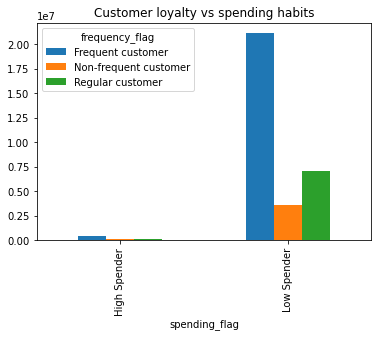

In [19]:
crosstab_spender_loyalty = crosstab_spender_frequency.plot(kind = 'bar', title = 'Customer loyalty vs spending habits')

In [20]:
# export visualization

crosstab_spender_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_spender_loyalty.png'))

In [33]:
# check spending habits by age and marital status

crosstab_age_spending = pd.crosstab(full_merge_PII['age_group'], full_merge_PII['spending_flag'], dropna = False )

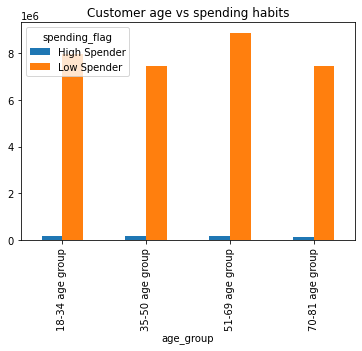

In [34]:
crosstab_age_spending = crosstab_age_spending.plot(kind = 'bar', title = 'Customer age vs spending habits')

In [35]:
# export visualization

crosstab_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_spend.png'))

In [36]:
crosstab_marital_spending = pd.crosstab(full_merge_PII['marital_status'], full_merge_PII['spending_flag'], dropna = False )

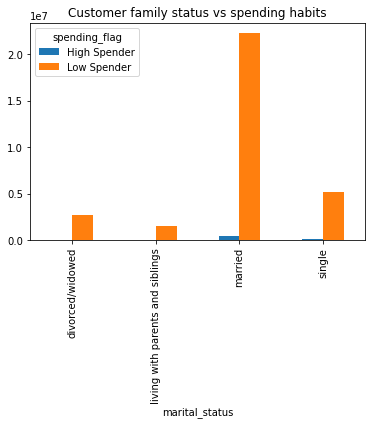

In [37]:
crosstab_marital_spending = crosstab_marital_spending.plot(kind = 'bar', title = 'Customer family status vs spending habits')

In [38]:
# export visualization

crosstab_marital_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_marital_spend.png'))

In [40]:
# age vs price 

crosstab_age_price = pd.crosstab(full_merge_PII['age_group'], full_merge_PII['price_range_loc'], dropna = False )

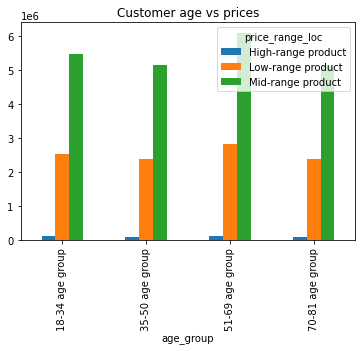

In [41]:
crosstab_age_price = crosstab_age_price.plot(kind = 'bar', title = 'Customer age vs prices')

In [43]:
# export visualization

crosstab_age_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_price.png'))

In [45]:
# income vs price 

crosstab_income_price = pd.crosstab(full_merge_PII['income_group'], full_merge_PII['price_range_loc'], dropna = False )

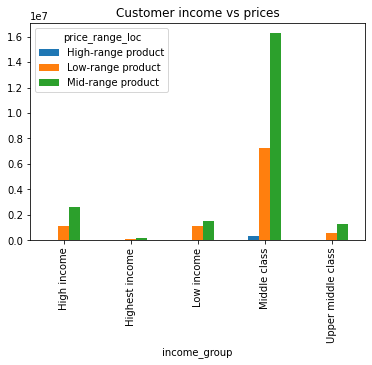

In [46]:
crosstab_income_price = crosstab_income_price.plot(kind = 'bar', title = 'Customer income vs prices')

In [47]:
# export visualization

crosstab_income_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_price.png'))

In [49]:
# age vs frequency

crosstab_age_frequency = pd.crosstab(full_merge_PII['age_group'], full_merge_PII['frequency_flag'], dropna = False )

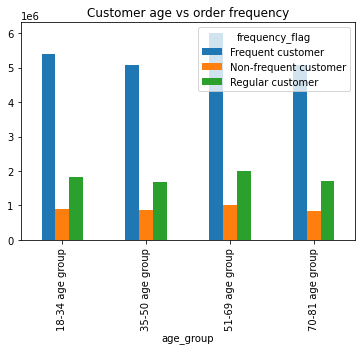

In [50]:
crosstab_age_frequency = crosstab_age_frequency.plot(kind = 'bar', title = 'Customer age vs order frequency')

In [51]:
# export visualization

crosstab_age_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_frequency.png'))

In [52]:
# income vs frequency

crosstab_income_frequency = pd.crosstab(full_merge_PII['income_group'], full_merge_PII['frequency_flag'], dropna = False )

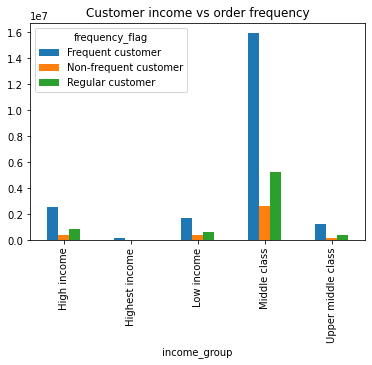

In [53]:
crosstab_income_frequency = crosstab_income_frequency.plot(kind = 'bar', title = 'Customer income vs order frequency')

In [54]:
# export visualization

crosstab_income_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_incom_frequency.png'))

In [55]:
# age vs goods profile

crosstab_age_goods = pd.crosstab(full_merge_PII['age_group'], full_merge_PII['goods_profile'], dropna = False )

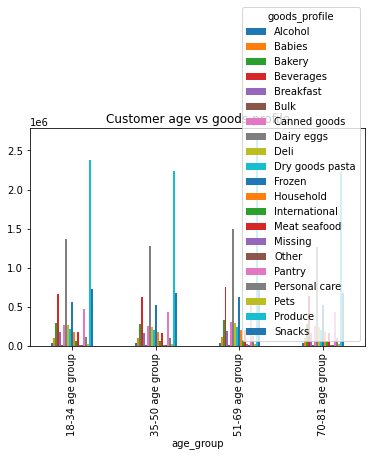

In [56]:
crosstab_age_goods = crosstab_age_goods.plot(kind = 'bar', title = 'Customer age vs goods profile')

In [57]:
# export visualization

crosstab_age_goods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_goods.png'))

In [58]:
# income vs goods profile

crosstab_income_goods = pd.crosstab(full_merge_PII['income_group'], full_merge_PII['goods_profile'], dropna = False )

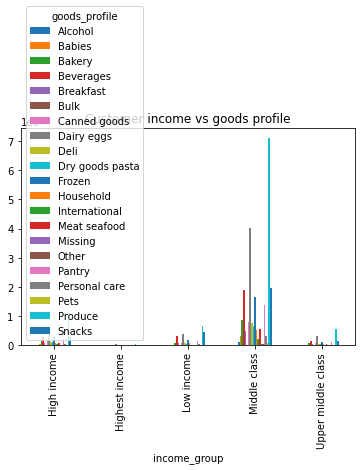

In [59]:
crosstab_income_goods = crosstab_income_goods.plot(kind = 'bar', title = 'Customer income vs goods profile')

In [60]:
# export visualization

crosstab_income_goods.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_income_goods.png'))